# Lab 1: Introduction to Computer Vision

**Computer Vision Course - Insper**

In this lab, you will learn:
- How to load and display images using OpenCV
- Basic image operations (grayscale conversion, cropping, resizing)
- Drawing on images (rectangles, circles, text)
- Template matching for object detection

## Setup

### Running Locally

If running on your local machine, make sure you're in the lab directory:
```bash
cd labs/lab01_introduction
jupyter notebook
```

### Running on Google Colab

If running on Google Colab, uncomment and run the cell below to clone the repository:

In [3]:
# Uncomment these lines if running on Google Colab
!git clone https://github.com/mjck/computer-vision.git
%cd computer-vision/labs/lab01_introduction

Cloning into 'computer-vision'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 54 (delta 7), reused 52 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 8.07 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/computer-vision/labs/lab01_introduction


## Import Libraries

We'll use:
- `numpy` for array operations
- `cv2` (OpenCV) for computer vision functions
- `sdx` our custom course utilities module

In [4]:
import numpy as np
import cv2 as cv
import sys

# Add parent directory to path to import sdx module
sys.path.append('../../')  # Adjust if needed

from sdx import *

## Part 1: Loading and Displaying Images

To load an image, we use the `cv_imread` function. This function:
- Loads the image from disk
- Converts BGR (OpenCV default) to RGB (for proper display)
- Returns a numpy array

To display an image, we use `cv_imshow`, which uses matplotlib to display the image.

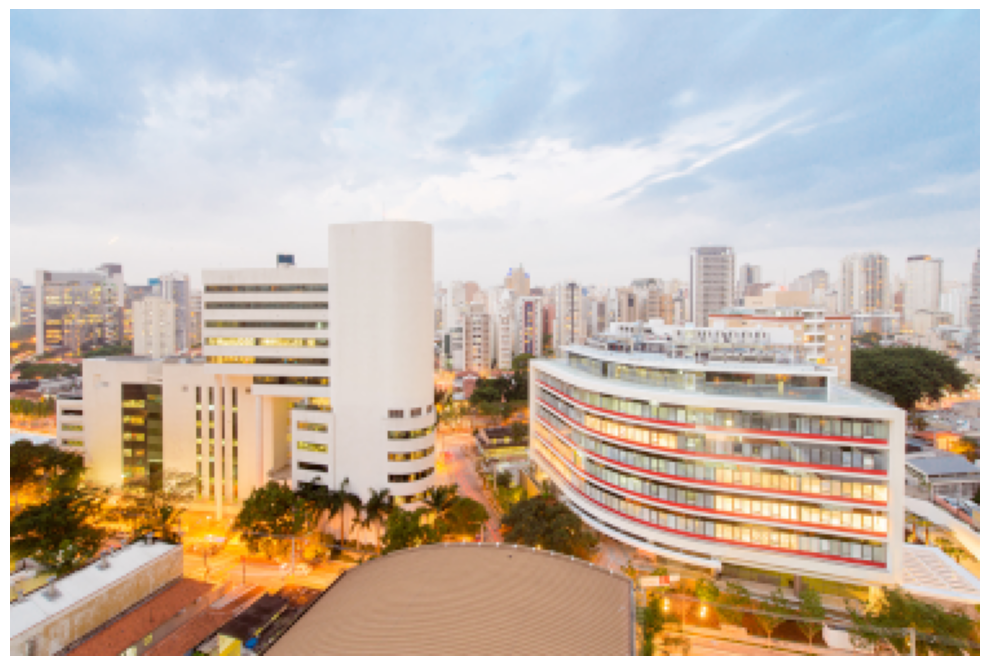

In [6]:
# Load the Insper logo
image = cv_imread('insper.png')

# Display it
cv_imshow(image)

### Understanding Image Arrays

Let's examine what an image actually is in Python:

In [7]:
# Print image information
print_image_info(image, "Insper Logo")

# Images are just NumPy arrays!
print(f"\nImage is a NumPy array: {type(image)}")
print(f"Array shape: {image.shape}")
print(f"  - Height: {image.shape[0]} pixels")
print(f"  - Width: {image.shape[1]} pixels")
print(f"  - Channels: {image.shape[2]} (RGB)")

Insper Logo Information:
  Shape: (250, 375, 3)
  Data type: uint8
  Min value: 0
  Max value: 255
  Mean value: 181.46
  Std deviation: 59.33

Image is a NumPy array: <class 'numpy.ndarray'>
Array shape: (250, 375, 3)
  - Height: 250 pixels
  - Width: 375 pixels
  - Channels: 3 (RGB)


## Part 2: Grayscale Conversion

Many computer vision algorithms work with grayscale images. Let's convert our image:

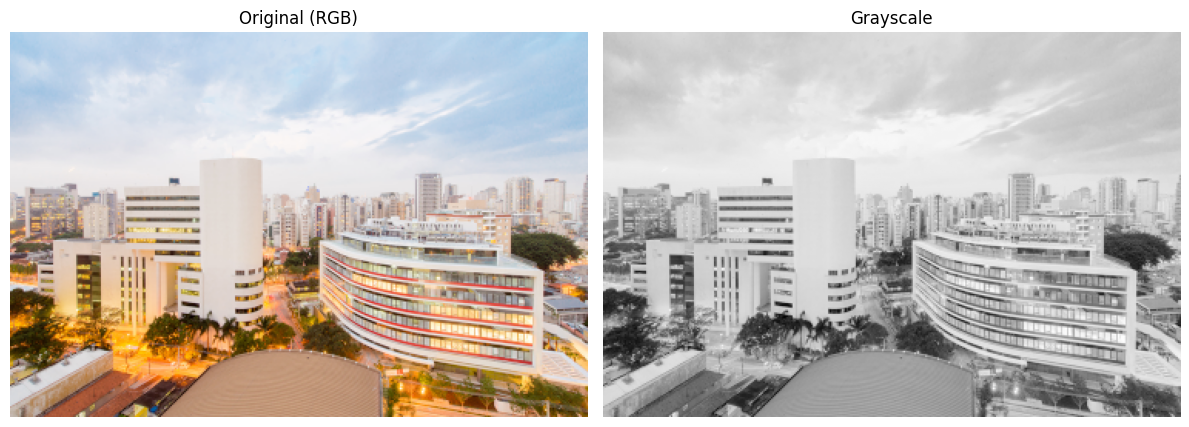

Original shape: (250, 375, 3)
Grayscale shape: (250, 375)


In [8]:
# Convert to grayscale
gray_image = bgr2gray(image)

# Display both images side by side
show_multiple(
    [image, gray_image],
    ["Original (RGB)", "Grayscale"],
    figsize=(12, 5)
)

# Notice the shape difference
print(f"Original shape: {image.shape}")
print(f"Grayscale shape: {gray_image.shape}")

Alternatively, you can load an image directly as grayscale:

In [9]:
# Load directly as grayscale
gray_direct = cv_grayread('insper.png')

cv_imshow(gray_direct, "Loaded as Grayscale")

FileNotFoundError: Could not read image: data/insper.png

## Part 3: Basic Image Operations

### Cropping

Crop a region of interest using array slicing:

In [ ]:
# Crop the center portion
h, w = gray_image.shape
crop_h, crop_w = h // 2, w // 2

# Slicing: [start_y:end_y, start_x:end_x]
cropped = gray_image[crop_h//2:crop_h//2+crop_h, crop_w//2:crop_w//2+crop_w]

show_multiple(
    [gray_image, cropped],
    ["Original", "Cropped (Center)"],
    figsize=(12, 5)
)

### Resizing

Change image dimensions:

In [ ]:
# Resize to specific dimensions
resized = cv.resize(gray_image, (200, 100))  # (width, height)

print(f"Original size: {gray_image.shape}")
print(f"Resized size: {resized.shape}")

cv_imshow(resized, "Resized Image")

## Part 4: Drawing on Images

OpenCV provides functions to draw shapes and text on images.

### Drawing Rectangles

In [ ]:
# Create a copy to draw on (don't modify original)
img_with_rectangle = image.copy()

# Draw a rectangle
# cv.rectangle(img, top_left, bottom_right, color, thickness)
top_left = (50, 50)
bottom_right = (200, 150)
color = (255, 0, 0)  # Red in RGB
thickness = 3

cv.rectangle(img_with_rectangle, top_left, bottom_right, color, thickness)

cv_imshow(img_with_rectangle, "Image with Rectangle")

### Drawing Circles

In [ ]:
# Create a copy
img_with_circle = image.copy()

# Draw a circle
# cv.circle(img, center, radius, color, thickness)
center = (image.shape[1]//2, image.shape[0]//2)  # Center of image
radius = 50
color = (0, 255, 0)  # Green in RGB
thickness = 2

cv.circle(img_with_circle, center, radius, color, thickness)

cv_imshow(img_with_circle, "Image with Circle")

### Adding Text

In [ ]:
# Create a copy
img_with_text = image.copy()

# Add text
# cv.putText(img, text, position, font, font_scale, color, thickness)
text = "Computer Vision"
position = (20, 40)
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (0, 0, 255)  # Blue in RGB
thickness = 2

cv.putText(img_with_text, text, position, font, font_scale, color, thickness)

cv_imshow(img_with_text, "Image with Text")

## Activity 1: Face Detection with Haar Cascades

Let's detect faces in an image using OpenCV's pre-trained Haar Cascade classifier.

In [ ]:
# Load the face cascade classifier
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load an image with faces
face_image = cv_imread('data/faces.jpg')  # You'll need to add a sample image
face_gray = bgr2gray(face_image)

# Detect faces
faces = face_cascade.detectMultiScale(face_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Found {len(faces)} face(s)")

# Draw rectangles around faces
output_image = face_image.copy()
for (x, y, w, h) in faces:
    # Draw rectangle
    left_top = (x, y)
    right_bottom = (x + w, y + h)
    color = (0, 255, 0)  # Green
    thickness = 2
    cv.rectangle(output_image, left_top, right_bottom, color, thickness)

cv_imshow(output_image, "Detected Faces")

## Activity 2: Template Matching

Template matching is a simple but effective method for finding a small image (template) within a larger image.

We'll find the Insper building in a larger photo of the campus.

In [ ]:
# Load the template (the building we want to find)
template = cv_imread('data/template.png')

cv_imshow(template, "Template (Building to Find)")

In [ ]:
# Load the main image (campus photo)
main_image = cv_imread('data/insper.png')

cv_imshow(main_image, "Main Image (Where to Search)")

### Your Task

Write code to:
1. Convert both images to grayscale
2. Find the location of the template in the main image
3. Draw a rectangle around the found location

**Hint:** You can use OpenCV's `cv.matchTemplate()` function, or implement it from scratch using nested loops and correlation.

In [ ]:
# Your code here

# Method 1: Using OpenCV's matchTemplate (easy way)
# Convert to grayscale
template_gray = bgr2gray(template)
main_gray = bgr2gray(main_image)

# Perform template matching
result = cv.matchTemplate(main_gray, template_gray, cv.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Get template dimensions
h, w = template_gray.shape

# Draw rectangle at best match location
output_image = main_image.copy()
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 3)

cv_imshow(output_image, f"Found Template (Confidence: {max_val:.2f})")

### Challenge 2a: Implement with Fewer Loops

Try to implement template matching using NumPy operations instead of explicit loops.

**Hint:** Look into NumPy's correlation functions or sliding window techniques.

In [ ]:
# Your optimized code here

# Example using correlation
from scipy import signal

# Normalize template and image
template_norm = (template_gray - template_gray.mean()) / template_gray.std()
image_norm = (main_gray - main_gray.mean()) / main_gray.std()

# Correlate
correlation = signal.correlate2d(image_norm, template_norm, mode='valid')

# Find peak
y, x = np.unravel_index(correlation.argmax(), correlation.shape)

# Draw result
output_image = main_image.copy()
h, w = template_gray.shape
cv.rectangle(output_image, (x, y), (x+w, y+h), (255, 0, 0), 3)

cv_imshow(output_image, "Template Found (NumPy Method)")

### Challenge 2b: Robust Template Matching

Try your template matching on a slightly different image (with lighting changes, rotations, etc.):

In [ ]:
# Load the different image
diff_image = cv_grayread('data/insper-diff.png')

cv_imshow(diff_image, "Different Lighting Conditions")

In [ ]:
# Your robust matching code here
# Hint: Try different matching methods (TM_CCOEFF_NORMED is robust to brightness changes)
# Hint: Consider normalizing the images first

# Your solution


## Summary

In this lab, you learned:
- ✅ How to load and display images with OpenCV
- ✅ Image representation as NumPy arrays
- ✅ Converting between color and grayscale
- ✅ Basic operations: cropping, resizing
- ✅ Drawing shapes and text on images
- ✅ Face detection with Haar Cascades
- ✅ Template matching for object detection

### Next Steps

- Experiment with different images
- Try other OpenCV drawing functions
- Explore different template matching methods
- Look into feature-based matching (SIFT, ORB) for more robust detection